In [226]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [32]:
nltk.download('words') # download the list of English words
english_words = set(nltk.corpus.words.words()) # create a set of English words

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [360]:
import matplotlib.pyplot as plt

### Helping function

In [227]:
import re

def Clean_text(text):
    """
    Extract words from a string and return them as a list.
    """
    # Replace all non-word characters with whitespace
    text_cleaned = re.sub(r'http\S+|www.\S+', '', text )
    text_cleaned = re.sub(r'\b\w{8}-\w{4}-\w{4}-\w{4}-\w{12}\b', '', text_cleaned)
    text_cleaned = re.sub(r'[^\w\s]', ' ', text_cleaned)
    text_cleaned= text_cleaned.replace('_x000D_','')
    text_cleaned = re.sub(r'\b[A-Fa-f0-9]{32,64}\b', ' ', text_cleaned)
    text_cleaned = re.sub(r'\b[A-Fa-f0-9]{128}\b', ' ', text_cleaned)
    text_cleaned = re.sub(r'\d+', ' ', text_cleaned)
    text_cleaned = text_cleaned.replace('  ', '').replace('\n', ' ')
    
    return text_cleaned

In [228]:
import spacy
en = spacy.load('en_core_web_lg')
sw_spacy = en.Defaults.stop_words
def remove_sw(i):
    words = [word for word in i.split() if word.lower() not in sw_spacy and len(word)>1]
    new_text = " ".join(words)
    return new_text

In [242]:
def english_filter(i):
    english_words_list = [word for word in i.split() if word.lower() in english_words]
    new_text = " ".join(english_words_list)
    return new_text

In [238]:
def unuseful_words_filtering(i):
    unuseful_words = ['git', 'apache', 'svn', 'id', 'method', 'class', 'don', 'private', 'commons', 'test', 'use', 'fix', 'add', 'code', 'file', 'provider', 'string', 'static', 'upgrade', 'patch','static', 'package', 'instead', 'case','new' , 'final']
    words = [word for word in i.split() if word.lower() not in unuseful_words]
    new_text = " ".join(words)
    return new_text

In [257]:
from nltk.stem import SnowballStemmer

def stem_text(input_text):
    stemmer = SnowballStemmer("english")
    words = nltk.word_tokenize(input_text) 
    stemmed_words = [stemmer.stem(word) for word in words]
    output_text = " ".join(stemmed_words)
    return output_text


In [329]:
# Define a function to count occurrences of words in text
def count_words(text, word_list):
    return sum(1 for word in word_list if word in text)

### Random Forest

In [305]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,f1_score ,precision_score,recall_score

In [480]:
df1 = pd.read_excel('commons-bcel.xlsx')
df2 = pd.read_excel('commons-vfs.xlsx')
df3 = pd.read_excel('commons-codec.xlsx')
df4 = pd.read_excel('javalin.xlsx')
df=pd.concat([df1, df2,df3 , df4 ], axis=0)

In [494]:
df=df4

In [495]:
df = df.drop(['complexity_old'], axis=1)
df['Readability_variation']= df['readibility']- df['readibility_old']
df = df.dropna()
df = df.groupby(['msg'])['Readability_variation'].sum().reset_index()

In [496]:
len(df)

558

In [308]:
df['Readability_increased']=df['Readability_variation']>0

In [309]:
df['msg'] = df['msg'].apply(Clean_text)

In [310]:
df['msg'] = df['msg'].apply(remove_sw)

In [311]:
df['msg'] = df['msg'].apply(stem_text)

In [312]:
df['msg'] = df['msg'].apply(unuseful_words_filtering)

In [313]:
df['msg'] = df['msg'].apply(english_filter)

In [314]:
# Remove rows with empty strings 
df = df[df['msg'] != '']

In [315]:
df

,msg,Readability_variation,Readability_increased
0,except throw,0.000010,True
2,comment check fail long bug lurk concern assig...,-0.000084,False
3,meta intern fail dont know dont want adjust tr...,-0.099606,False
8,minor typo minor typo project document comment...,-0.000744,False
9,typo typo field constant name name name except,-0.004945,False
...,...,...,...
5024,server start root gif context,0.025449,True
5025,wrong check,-0.143829,False
5026,wrong name,0.031399,True
5027,wrong ant common compress,0.000000,False


In [316]:
df=df[['msg','Readability_increased']]

In [317]:
X_train, X_test1, y_train, y_test = train_test_split(df['msg'], df['Readability_increased'], test_size=0.2, random_state=42)


In [318]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test1)

In [319]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

In [320]:
y_pred = rf.predict(X_test)

In [321]:
accuracy = accuracy_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('precision:', precision)
print('recall:', recall)
print('f1:', f1)

Accuracy: 0.6124223602484472
precision: 0.5185185185185185
recall: 0.3925233644859813
f1: 0.4468085106382979


### Feature importance

In [417]:
data = {'msg': X_test1, 'readability increased prediction': y_pred,'readability increased reality':y_test}

# create a DataFrame from the dictionary
df_feature = pd.DataFrame(data)

In [418]:
df_feature

,msg,readability increased prediction,readability increased reality
2858,set,False,False
1470,spell,False,False
3391,tri comment,True,True
2434,check connect server under common net commit,False,True
1496,typo,False,False
...,...,...,...
3128,tighten access,False,False
4622,constant array,False,True
4912,regard,False,False
4852,need,True,True


In [419]:
c1=df_feature['readability increased prediction']==df_feature['readability increased reality']
c2=df_feature['readability increased reality']==True
df_feature_increased=df_feature[c1 & c2]

In [428]:
c3=df_feature['readability increased reality']==False
df_feature_decreased=df_feature_increased=df_feature[c1 & c3 ]

In [431]:
df_feature_decreased

,msg,readability increased prediction,readability increased reality,Count
2858,set,False,False,0.0
1470,spell,False,False,0.0
1496,typo,False,False,0.0
664,better name,False,False,1.0
1009,serial version except,False,False,0.0
...,...,...,...,...
1698,bug,False,False,0.0
4368,process refer,False,False,0.0
2444,run default dig,False,False,0.0
3128,tighten access,False,False,0.0


In [390]:
Increase_list=['support', 'set', 'base','allow', 'assert', 'implement', 'local', 'line', 'configur', 'miss','refactor', 'enhanc' , 'clean' ,'simplifi','duplicat']

In [391]:
decrease_list=['implement', 'lock', 'need', 'miss', 'base', 'system', 'better', 'close', 'check', 'remov', 'log', 'simplifi','featur' ,'conflict'  , 'configur' ,'paramet']

In [421]:
for index, row in df_feature_increased.iterrows():
    df_feature_increased.at[index, 'Count']=count_words(row['msg'], Increase_list)

<ipython-input-421-a2721ef7e52a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feature_increased.at[index, 'Count']=count_words(row['msg'], Increase_list)


In [430]:
for index, row in df_feature_decreased.iterrows():
    df_feature_decreased.at[index, 'Count']=count_words(row['msg'], decrease_list)

<ipython-input-430-ef172aaba1f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feature_decreased.at[index, 'Count']=count_words(row['msg'], decrease_list)


In [424]:
df_feature_increased['Count'].value_counts()

0.0    108
1.0     16
2.0      2
Name: Count, dtype: int64

In [434]:
df_feature_decreased['Count'].value_counts()

0.0    310
1.0     57
Name: Count, dtype: int64

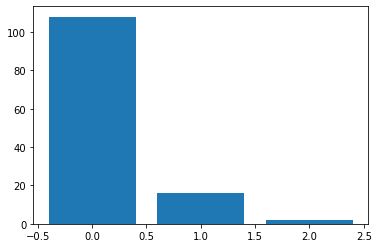

In [426]:
counts = df_feature_increased['Count'].value_counts()
plt.bar(counts.index, counts.values)
plt.show()

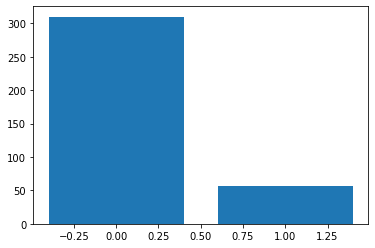

In [432]:
counts = df_feature_decreased['Count'].value_counts()
plt.bar(counts.index, counts.values)
plt.show()

### Evaluation Cross-projects

commons-codec and commons-bcel vs commons-vfs

In [435]:
df1 = pd.read_excel('commons-bcel.xlsx')
df2 = pd.read_excel('commons-vfs.xlsx')
df3 = pd.read_excel('commons-codec.xlsx')
df=pd.concat([df1,df3], axis=0)

In [437]:
def Preprocessing(df):
    df = df.drop(['complexity_old'], axis=1)
    df['Readability_variation']= df['readibility']- df['readibility_old']
    df = df.dropna()
    df = df.groupby(['msg'])['Readability_variation'].sum().reset_index()
    df['Readability_increased']=df['Readability_variation']>0
    df['msg'] = df['msg'].apply(Clean_text)
    df['msg'] = df['msg'].apply(stem_text)
    df['msg'] = df['msg'].apply(unuseful_words_filtering)
    df['msg'] = df['msg'].apply(english_filter)
    df = df[df['msg'] != '']
    df=df[['msg','Readability_increased']]
    return df

In [438]:
df=Preprocessing(df)

In [440]:
df2=Preprocessing(df2)

In [441]:
len(df2)

1708

In [444]:
X_train=df['msg']
y_train=df['Readability_increased']
X_test=df2['msg']
y_test=df2['Readability_increased']

In [445]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('precision:', precision)
print('recall:', recall)
print('f1:', f1)

Accuracy: 0.5895784543325527
precision: 0.46702317290552586
recall: 0.39457831325301207
f1: 0.42775510204081635


commons-vfs and commons-bcel vs commons-codec

In [446]:
df1 = pd.read_excel('commons-bcel.xlsx')
df2 = pd.read_excel('commons-vfs.xlsx')
df3 = pd.read_excel('commons-codec.xlsx')
df=pd.concat([df1,df2], axis=0)

In [447]:
df=Preprocessing(df)
df3=Preprocessing(df3)

In [449]:
len(df3)

1122

In [450]:
X_train=df['msg']
y_train=df['Readability_increased']
X_test=df3['msg']
y_test=df3['Readability_increased']

In [451]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('precision:', precision)
print('recall:', recall)
print('f1:', f1)

Accuracy: 0.5873440285204992
precision: 0.4738562091503268
recall: 0.3243847874720358
f1: 0.3851261620185923


commons-vfs and commons-codec vs commons-bcel

In [452]:
df1 = pd.read_excel('commons-bcel.xlsx')
df2 = pd.read_excel('commons-vfs.xlsx')
df3 = pd.read_excel('commons-codec.xlsx')
df=pd.concat([df3,df2], axis=0)

In [453]:
df=Preprocessing(df)
df1=Preprocessing(df1)

In [455]:
len(df1)

1181

In [456]:
X_train=df['msg']
y_train=df['Readability_increased']
X_test=df1['msg']
y_test=df1['Readability_increased']

In [457]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('precision:', precision)
print('recall:', recall)
print('f1:', f1)

Accuracy: 0.6045723962743438
precision: 0.5149253731343284
recall: 0.2905263157894737
f1: 0.3714670255720054


### Evaluation within-project 

commons-vfs

In [463]:
df = pd.read_excel('commons-vfs.xlsx')

In [464]:
df=Preprocessing(df)
X_train, X_test, y_train, y_test = train_test_split(df['msg'], df['Readability_increased'], test_size=0.2, random_state=42)

In [465]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('precision:', precision)
print('recall:', recall)
print('f1:', f1)

Accuracy: 0.5994152046783626
precision: 0.6181818181818182
recall: 0.22666666666666666
f1: 0.33170731707317075


commons-codec

In [466]:
df = pd.read_excel('commons-codec.xlsx')

In [467]:
df=Preprocessing(df)
X_train, X_test, y_train, y_test = train_test_split(df['msg'], df['Readability_increased'], test_size=0.2, random_state=42)

In [468]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('precision:', precision)
print('recall:', recall)
print('f1:', f1)

Accuracy: 0.5911111111111111
precision: 0.5263157894736842
recall: 0.3157894736842105
f1: 0.39473684210526316


commons-bcel

In [469]:
df = pd.read_excel('commons-bcel.xlsx')

In [470]:
df=Preprocessing(df)
X_train, X_test, y_train, y_test = train_test_split(df['msg'], df['Readability_increased'], test_size=0.2, random_state=42)

In [471]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('precision:', precision)
print('recall:', recall)
print('f1:', f1)

Accuracy: 0.569620253164557
precision: 0.5443037974683544
recall: 0.3944954128440367
f1: 0.4574468085106383


javalin

In [476]:
df = pd.read_excel('javalin.xlsx')

In [477]:
df=Preprocessing(df)
X_train, X_test, y_train, y_test = train_test_split(df['msg'], df['Readability_increased'], test_size=0.2, random_state=42)

In [475]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('precision:', precision)
print('recall:', recall)
print('f1:', f1)

Accuracy: 0.5638297872340425
precision: 0.4583333333333333
recall: 0.28205128205128205
f1: 0.34920634920634913


In [478]:
len(df)

469